In [1]:
!pip install psycopg2
!pip install psycopg2-binary


In [4]:
#connectdatabase
import psycopg2

def connect_to_db():
    try:
        conn = psycopg2.connect(
            host='localhost',           # PostgreSQL host
            database='stock',           # PostgreSQL database name
            user='postgres',            # PostgreSQL username
            password='admin',           # PostgreSQL password
            port='5432'                 # PostgreSQL default port
        )
        return conn, conn.cursor()
    except Exception as e:
        print(f"Database connection error: {e}")
        exit()

conn, cursor = connect_to_db()

In [7]:
import yfinance as yf


In [8]:
# Define the ticker symbol
ticker_symbol = "MSFT"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data for the last 30 days
historical_data = ticker.history(period="1mo")  # data for the last month

# Display a summary of the fetched data
print(f"Summary of Historical Data for {ticker_symbol}:")
print(historical_data[['Open', 'High', 'Low', 'Close', 'Volume']])

Summary of Historical Data for MSFT:
                                 Open        High         Low       Close  \
Date                                                                        
2025-01-22 00:00:00-05:00  437.559998  447.269989  436.000000  446.200012   
2025-01-23 00:00:00-05:00  442.000000  446.750000  441.500000  446.709991   
2025-01-24 00:00:00-05:00  445.160004  446.649994  441.399994  444.059998   
2025-01-27 00:00:00-05:00  424.010010  435.200012  423.500000  434.559998   
2025-01-28 00:00:00-05:00  434.600006  448.380005  431.380005  447.200012   
2025-01-29 00:00:00-05:00  446.690002  446.880005  440.399994  442.329987   
2025-01-30 00:00:00-05:00  418.769989  422.859985  413.160004  414.989990   
2025-01-31 00:00:00-05:00  418.980011  420.690002  414.910004  415.059998   
2025-02-03 00:00:00-05:00  411.600006  415.410004  408.660004  410.920013   
2025-02-04 00:00:00-05:00  412.690002  413.920013  409.739990  412.369995   
2025-02-05 00:00:00-05:00  412.350006  

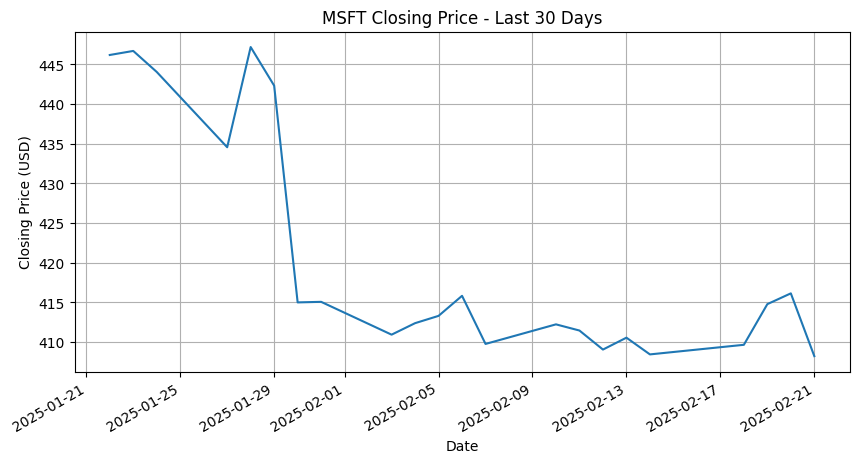

In [9]:
import matplotlib.pyplot as plt

historical_data['Close'].plot(title=f"{ticker_symbol} Closing Price - Last 30 Days", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()


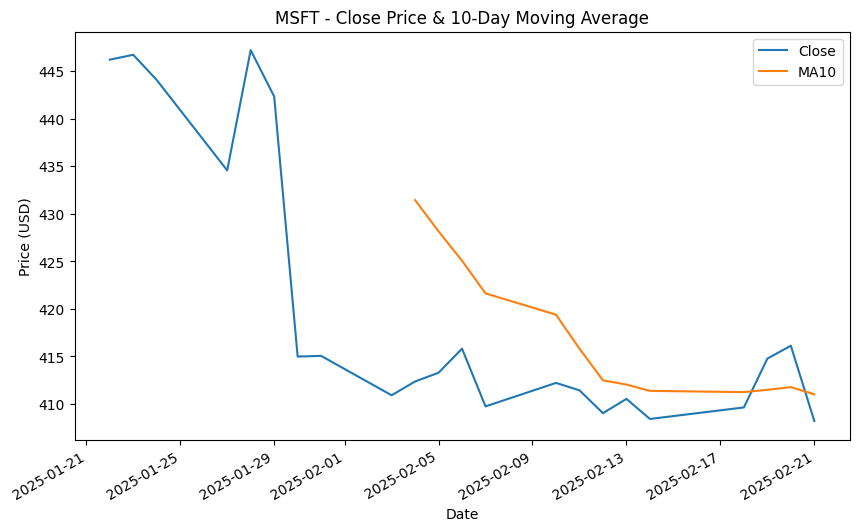

In [10]:
historical_data['MA10'] = historical_data['Close'].rolling(window=10).mean()

historical_data[['Close', 'MA10']].plot(figsize=(10,6), title=f"{ticker_symbol} - Close Price & 10-Day Moving Average")
plt.ylabel("Price (USD)")
plt.show()


<Figure size 1000x600 with 0 Axes>

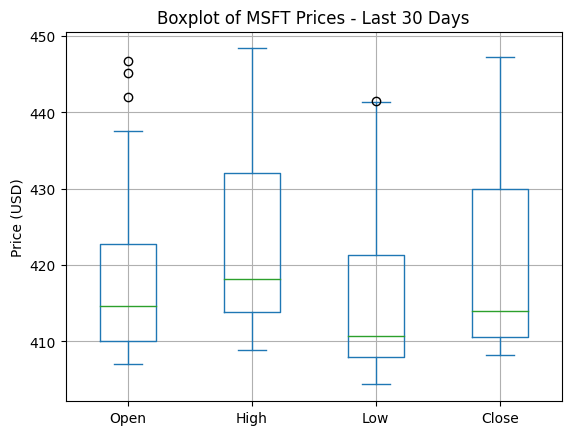

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
ticker_symbol = "MSFT"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data for the last 30 days
historical_data = ticker.history(period="1mo")

# Plot a boxplot for Open, High, Low, and Close prices
plt.figure(figsize=(10, 6))
historical_data[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.title(f"Boxplot of {ticker_symbol} Prices - Last 30 Days")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


In [13]:
pip install mplfinance


Note: you may need to restart the kernel to use updated packages.


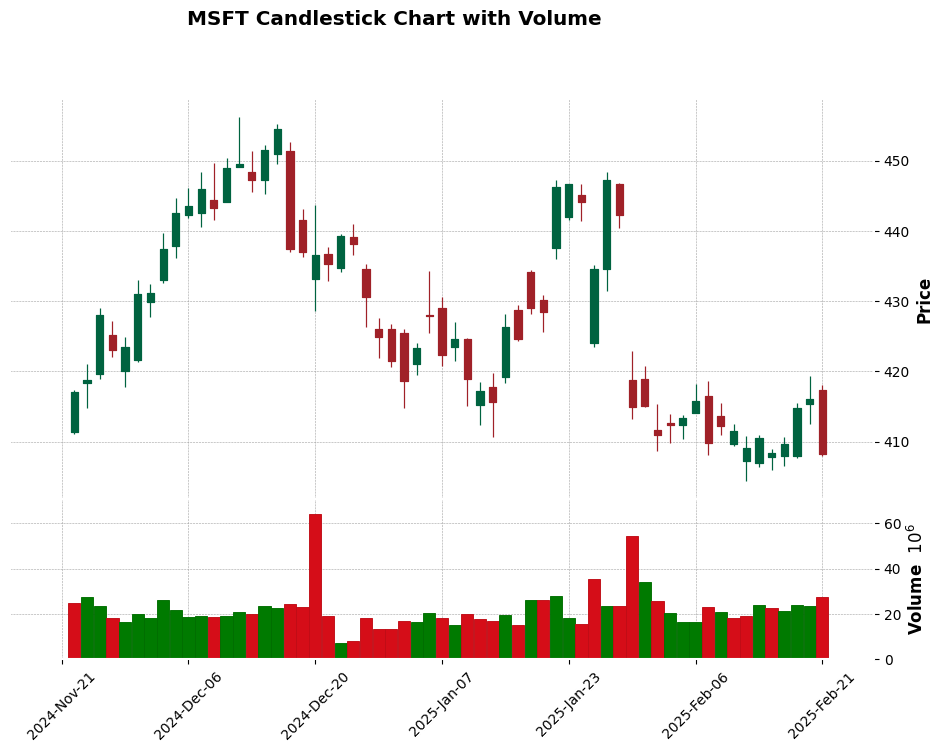

In [14]:
import yfinance as yf
import mplfinance as mpf

# Define the ticker symbol
ticker_symbol = "MSFT"

# Fetch historical market data for the last 3 months
ticker = yf.Ticker(ticker_symbol)
historical_data = ticker.history(period="3mo")

# Plot the candlestick chart with volume
mpf.plot(
    historical_data, 
    type='candle', 
    volume=True, 
    title=f"{ticker_symbol} Candlestick Chart with Volume", 
    style='charles', 
    figsize=(12, 8)
)


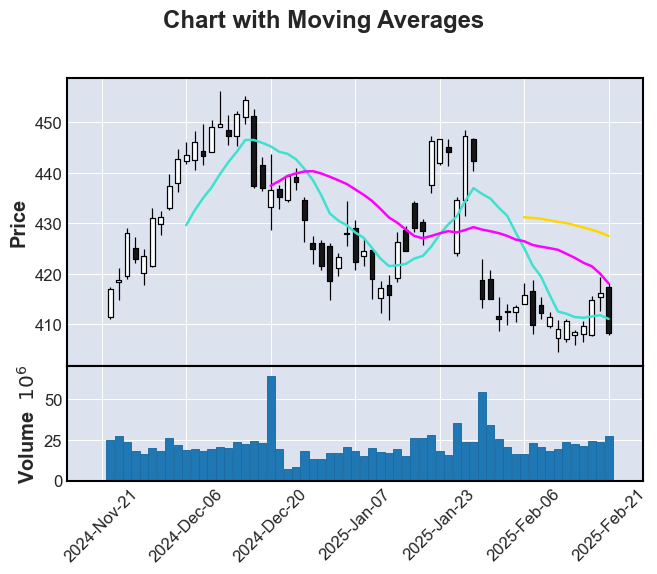

In [15]:
mpf.plot(historical_data, type='candle', volume=True, mav=(10, 20, 50), title="Chart with Moving Averages")


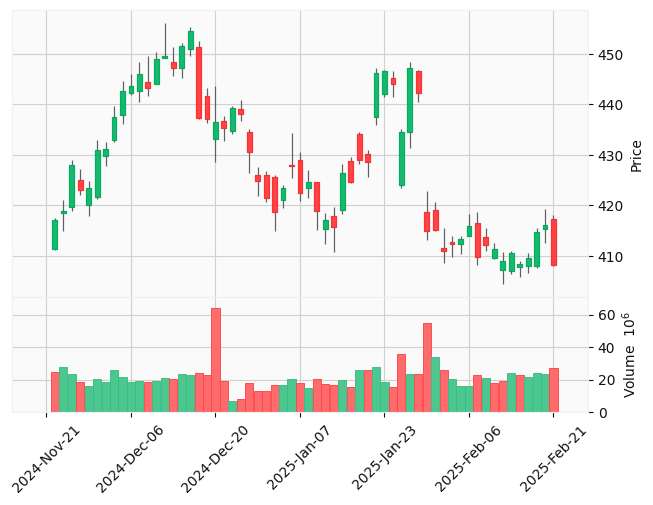

In [16]:
mpf.plot(historical_data, type='candle', volume=True, style='yahoo')


In [17]:
pip install requests pandas matplotlib


In [21]:
import requests

api_key = "6NVAGUL8MJ896DLS"  # 🔑 ใส่ API Key ที่ถูกต้อง
symbol = "PTT.BK"

# URL สำหรับตรวจสอบ Symbol
url = f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={symbol}&apikey={api_key}"

response = requests.get(url)
data = response.json()

# ตรวจสอบผลลัพธ์การค้นหา Symbol
print("Symbol Search Result:", data)


Symbol Search Result: {'bestMatches': []}


                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2024-11-21 00:00:00+07:00  32.50  33.25  32.25  33.00  37966000        0.0   
2024-11-22 00:00:00+07:00  33.25  33.75  33.25  33.75  21975600        0.0   
2024-11-25 00:00:00+07:00  33.75  33.75  33.25  33.25  38123400        0.0   
2024-11-26 00:00:00+07:00  33.25  33.50  32.75  33.00  21457400        0.0   
2024-11-27 00:00:00+07:00  32.75  32.75  32.50  32.50  11700600        0.0   

                           Stock Splits  
Date                                     
2024-11-21 00:00:00+07:00           0.0  
2024-11-22 00:00:00+07:00           0.0  
2024-11-25 00:00:00+07:00           0.0  
2024-11-26 00:00:00+07:00           0.0  
2024-11-27 00:00:00+07:00           0.0  


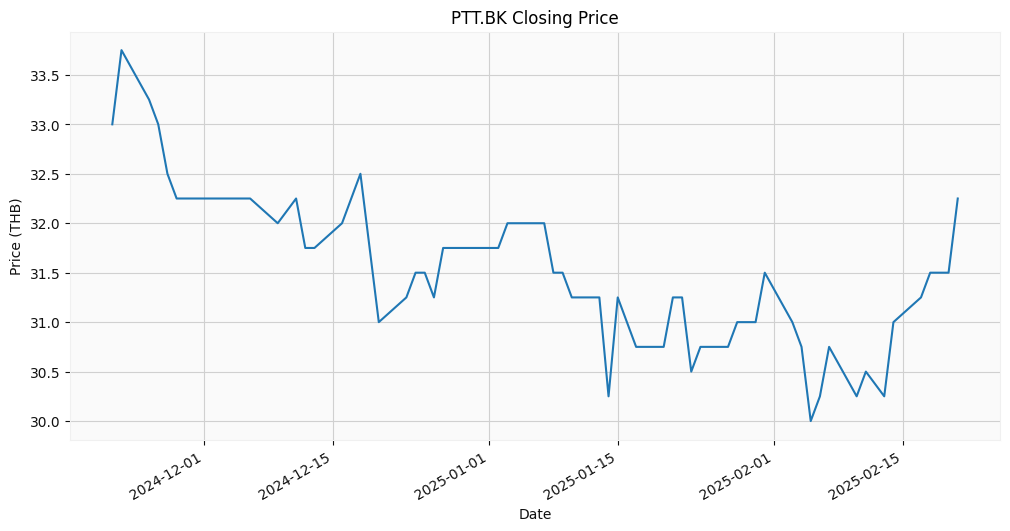

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# สัญลักษณ์หุ้นไทย
symbol = "PTT.BK"

# ดึงข้อมูลหุ้น
ticker = yf.Ticker(symbol)
historical_data = ticker.history(period="3mo")

# แสดงข้อมูลบางส่วน
print(historical_data.head())

# วาดกราฟราคาปิด
historical_data['Close'].plot(title=f"{symbol} Closing Price", figsize=(12,6))
plt.ylabel("Price (THB)")
plt.grid(True)
plt.show()


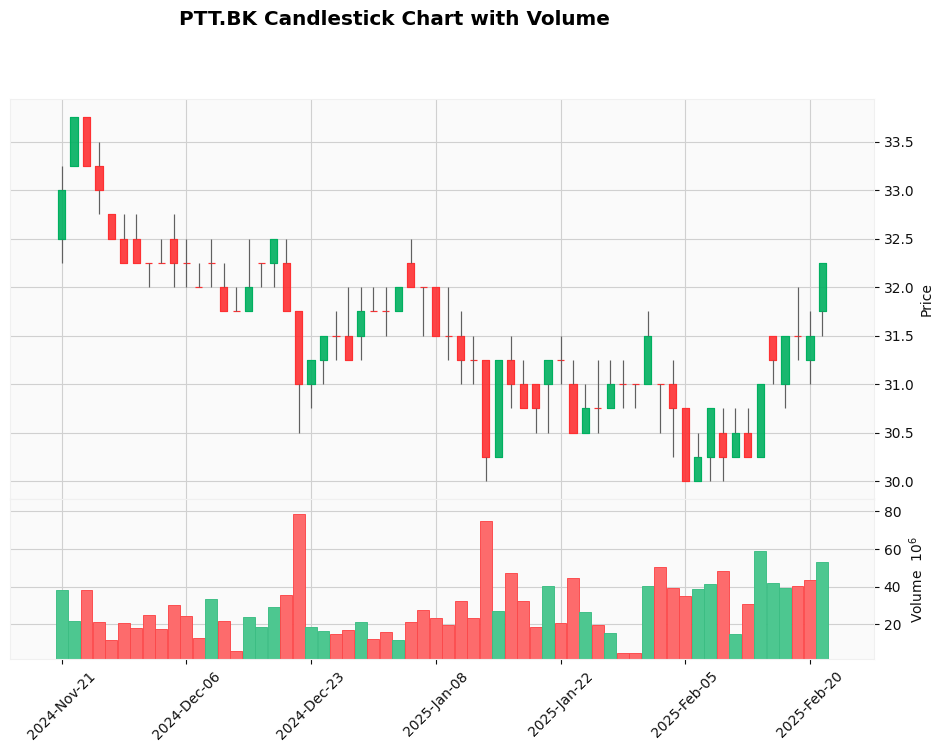

In [23]:
import yfinance as yf
import mplfinance as mpf

# 📈 เลือกหุ้นไทย เช่น PTT.BK
symbol = "PTT.BK"

# 🔥 ดึงข้อมูลย้อนหลัง 3 เดือน
ticker = yf.Ticker(symbol)
historical_data = ticker.history(period="3mo")

# ✅ เลือกคอลัมน์ที่จำเป็นสำหรับกราฟ
historical_data = historical_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# 🖼️ วาดกราฟ Candlestick พร้อม Volume Bar
mpf.plot(
    historical_data, 
    type='candle', 
    volume=True, 
    style='yahoo', 
    title=f"{symbol} Candlestick Chart with Volume", 
    figsize=(12, 8)
)


In [24]:
import yfinance as yf

symbol = "PTT.BK"
ticker = yf.Ticker(symbol)

# ดึงข้อมูลพื้นฐาน
info = ticker.info

# แสดงข้อมูลสำคัญ
print(f"บริษัท: {info.get('longName')}")
print(f"Market Cap: {info.get('marketCap')}")
print(f"PE Ratio: {info.get('trailingPE')}")
print(f"EPS: {info.get('trailingEps')}")
print(f"Dividend Yield: {info.get('dividendYield')}")


บริษัท: PTT Public Company Limited
Market Cap: 921156714496
PE Ratio: 10.238095
EPS: 3.15
Dividend Yield: 8.06


In [26]:
import yfinance as yf

# เลือกหุ้นไทย เช่น AOT.BK (Airports of Thailand)
symbol = "GULF.BK"
ticker = yf.Ticker(symbol)

# ดึงข้อมูลพื้นฐาน
info = ticker.info

# แสดงข้อมูลสำคัญ
print(f"🔎 ข้อมูลหุ้น {info.get('longName')}")
print(f"Symbol: {info.get('symbol')}")
print(f"Exchange: {info.get('exchange')}")
print(f"Last Price: {info.get('regularMarketPrice')}")
print(f"Day High: {info.get('dayHigh')}")
print(f"Day Low: {info.get('dayLow')}")
print(f"Change: {info.get('regularMarketChange')} ({info.get('regularMarketChangePercent')}%)")
print(f"Volume: {info.get('volume')}")
print(f"EPS: {info.get('trailingEps')}")
print(f"P/E Ratio: {info.get('trailingPE')}")
print(f"Dividend Yield: {info.get('dividendYield')}")
print(f"Implied Volatility: {info.get('impliedVolatility')}")


🔎 ข้อมูลหุ้น Gulf Energy Development Public Company Limited
Symbol: GULF.BK
Exchange: SET
Last Price: 53.0
Day High: 53.75
Day Low: 51.25
Change: 1.75 (3.4146342%)
Volume: 34732837
EPS: 1.55
P/E Ratio: 34.19355
Dividend Yield: 1.91
Implied Volatility: None
